<a href="https://colab.research.google.com/github/sam505/Machine_Learning/blob/master/Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  Decide on solving a problem and find an appropriate data set.

The problem that will be solved in this exercise is predicting the price of houses based on several factors of the house such as the number of rooms, size of the living room, size of the premises, number of floors and several others. 

# 2. Write clearly the source of the data. Provide the link at the top.

The dataset used for this task is obtaimed from [Kaggle](https://www.kaggle.com/). 

Below is the link to the datset used for this project. 

[Dataset](https://www.kaggle.com/shree1992/housedata).

In [ ]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error, explained_variance_score, max_error, r2_score, mean_absolute_percentage_error


matplotlib.style.use("seaborn")

In [ ]:
# read the dataset into the notebook
data_path = "/content/data.csv"
df = pd.read_csv(data_path)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# 3. Apply data cleaning, data preparation, visualization, etc.

In [ ]:
# return the shape of the dataset
df.shape

(4600, 18)

In [ ]:
# get a statistical summary of the numerical columns in the dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

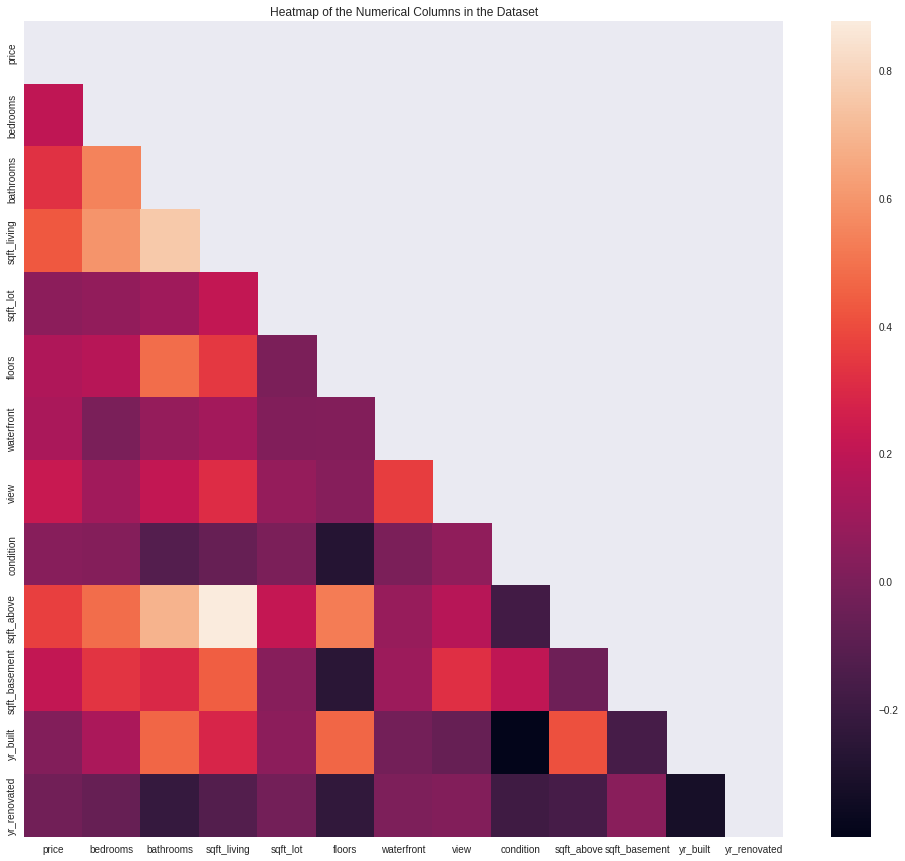

In [ ]:
# plot the heatmap of the numerical columns in the dataset
plt.figure(figsize=(17, 15))
corr_data = df.drop(['date'], axis=1)
corr_mask = np.triu(corr_data.corr())
h_map = sns.heatmap(corr_data.corr(), mask=corr_mask)
h_map
plt.title("Heatmap of the Numerical Columns in the Dataset")
plt.show()

The purpose of the above plot is to visualize how different variables in the dataset correlate with one another especially the correlation of the depend (target) variable with the independent variables (features).

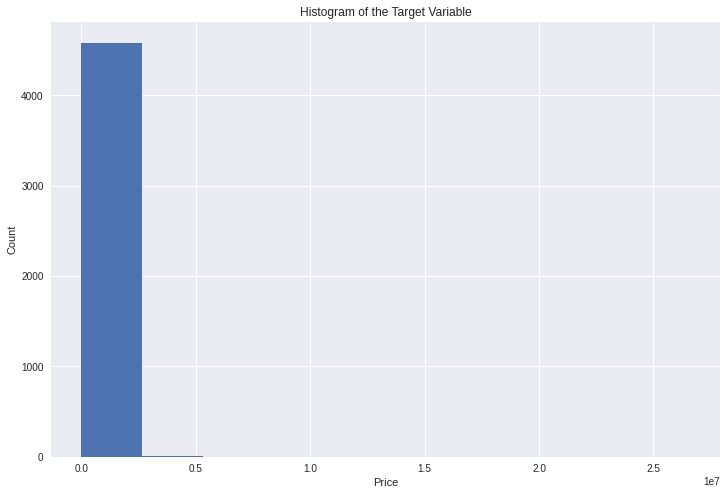

In [ ]:
# plot a hostogram of the target variable (price)
plt.figure(figsize=(12, 8))
plt.hist(df.price)
plt.title("Histogram of the Target Variable")
plt.ylabel("Count")
plt.xlabel("Price")
plt.show()

From the above plot, it is evident that, there is a significant number of outliers on the dataset (target variable). These outliers should be dropped so that the histogram plot can resemble a normal distribution of variables.

## Remove outliers in the target variable

Remove outliers from the target variable. Use the quartile range to identify values that are extreme (outliers). This improves the general performance of the model by ensuring that the data fed into the model is equally distributed.

In [ ]:
# Removing outliers in the dataset , 
q25 = np.percentile(df.price, 25)  # get the 25th percentile value
q75 = np.percentile(df.price, 75)  # get the 75th percentile value
iqr = q75 - q25  # get the interquartile range
cut_off = iqr * 1.5
lower, upper = 1, (q75 + cut_off)
data = df[(df.price < upper) & (df.price > lower)]  # filter the dataset
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


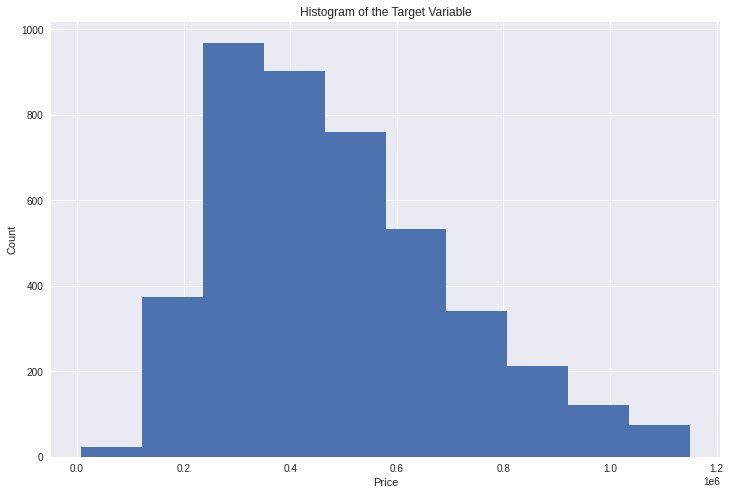

In [ ]:
# plot a hostogram of the target variable (price) after removing outliers
plt.figure(figsize=(12, 8))
plt.hist(data.price)
plt.title("Histogram of the Target Variable")
plt.ylabel("Count")
plt.xlabel("Price")
plt.show()

After dropping the columns that contained outliers values in the price column, the histogram resembles a normal distribution.

<Figure size 864x576 with 0 Axes>

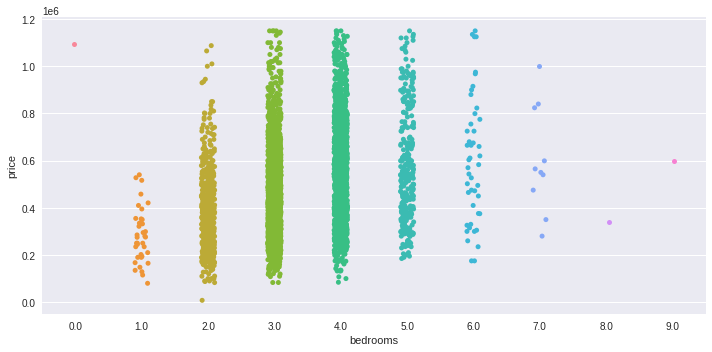

In [ ]:
# shows the distribution and also the correlation between price and the number of bedrooms
plt.figure(figsize=(12, 8))
sns.catplot(x='bedrooms', y='price', data=data, height=5, aspect=2)
plt.show()

<Figure size 864x576 with 0 Axes>

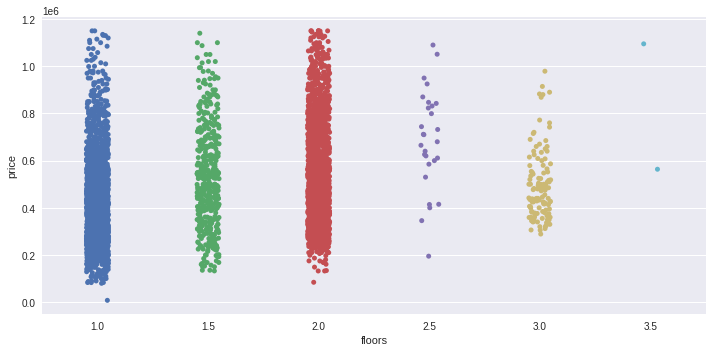

In [ ]:
# shows the distribution and also the correlation between price and the number of floors
plt.figure(figsize=(12, 8))
sns.catplot(x='floors', y='price', data=data, height=5, aspect=2)
plt.show()

The above plots indicate the distribution of train variables in each unique value. In addition to that, it shows the distribution of values over the range of the unique values in a feature. Most values are at the middle as expected.

From the first plot, 2-5 bedrooms houses are the most common in the dataset. Taking a look at the second plot, either 1 or 2 floor houses are most occuring in the dataset.

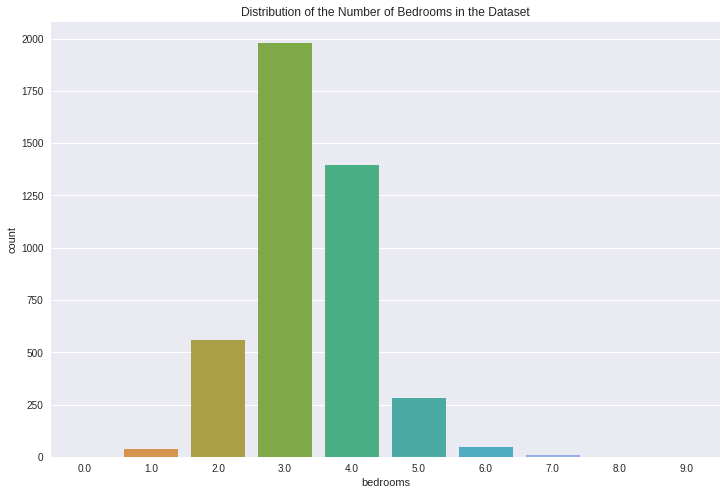

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x=data['bedrooms'])
plt.title("Distribution of the Number of Bedrooms in the Dataset")
plt.show()

3 bedrooms houses are the most in this particular dataset, followed by 4 bedroom haouses.

In [ ]:
# filter and work with numerical columns alone
data = data[data.describe().columns]

In [ ]:
# for all houses that have been renovated, replace value in yr_renovated with 1 or 0 if the house has never been renovated
data.yr_renovated = data.yr_renovated.apply(lambda x: 0 if x==0 else 1)
data

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,1
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,1
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [ ]:
X = data.drop('price', axis=1).values
y = data.price.astype(int).values

In [ ]:
# split data into train and test sets 80% trainset, 20% testset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3448, 12) (863, 12) (3448,) (863,)


# 4. Apply several of the machine learning models we have learned in class. Please, if possible, try to apply some models from outside the class.

Below, two helper functions have been defined, The `train` function takes in a model and fits it using the trainset and returns the trained model. The second function `get_score` takes in a trained model and calculates several metrics. The value of these metrics are also visualized in this function.

In [ ]:
def train(model):
  trained_model = model.fit(X=X_train, y=y_train)
  print("--Model Parameters--\n")
  params = trained_model.get_params()
  for param in params:
    print(param, ": ", params[param])
  print()
  return trained_model


model_eva = {}


def get_score(model):
  start_ts = time.time()
  y_pred = model.predict(X_test)
  mse = mean_squared_log_error(y_test, y_pred)
  evs = explained_variance_score(y_test, y_pred)
  me = max_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  end_ts = time.time()
  model_eva[str(model)] = [mse, evs, me, r2, mape]
  print("Mean Squared Log Error: ", mse)
  print("Explained Variance Score: ", evs)
  print("Max Error: ", me)
  print("R2 Score: ", r2)
  print("Mean Absolute Percentage Error: ", mape)
  print("CV Runtime:", end_ts - start_ts,"\n")

Models trained and tested gave been initialized and their perfomance results displayed below.

## Principal component analysis (PCA)

In [ ]:
pca = PCA(n_components="mle", svd_solver = "full")
pca_trained = train(pca)
pca_trained

--Model Parameters--

copy :  True
iterated_power :  auto
n_components :  mle
random_state :  None
svd_solver :  full
tol :  0.0
whiten :  False



PCA(n_components='mle', svd_solver='full')

## Random Forest Regressor

In [ ]:
rfg = RandomForestRegressor()
rfg_trained = train(rfg)
get_score(rfg_trained)

--Model Parameters--

bootstrap :  True
ccp_alpha :  0.0
criterion :  squared_error
max_depth :  None
max_features :  auto
max_leaf_nodes :  None
max_samples :  None
min_impurity_decrease :  0.0
min_samples_leaf :  1
min_samples_split :  2
min_weight_fraction_leaf :  0.0
n_estimators :  100
n_jobs :  None
oob_score :  False
random_state :  None
verbose :  0
warm_start :  False

Mean Squared Log Error:  0.1000705039485724
Explained Variance Score:  0.4932418578085327
Max Error:  670705.6
R2 Score:  0.4900225179456785
Mean Absolute Percentage Error:  0.26709797222827236
CV Runtime: 0.059833526611328125 



## Support Vector Machine Regression

In [ ]:
svm_r = SVR()
svm_r_trained = train(svm_r)
get_score(svm_r_trained)

--Model Parameters--

C :  1.0
cache_size :  200
coef0 :  0.0
degree :  3
epsilon :  0.1
gamma :  scale
kernel :  rbf
max_iter :  -1
shrinking :  True
tol :  0.001
verbose :  False

Mean Squared Log Error:  0.19871284993768887
Explained Variance Score:  5.97044172491179e-05
Max Error:  700845.0651932756
R2 Score:  -0.04914053056588452
Mean Absolute Percentage Error:  0.3916647282195042
CV Runtime: 0.2181394100189209 



## Bayesian Ridge Regression

In [ ]:
brr = BayesianRidge()
brr_trained = train(brr)
get_score(brr_trained)

--Model Parameters--

alpha_1 :  1e-06
alpha_2 :  1e-06
alpha_init :  None
compute_score :  False
copy_X :  True
fit_intercept :  True
lambda_1 :  1e-06
lambda_2 :  1e-06
lambda_init :  None
n_iter :  300
normalize :  deprecated
tol :  0.001
verbose :  False

Mean Squared Log Error:  0.1042113299635539
Explained Variance Score:  0.5063376684367704
Max Error:  607939.8587087994
R2 Score:  0.5030076481417585
Mean Absolute Percentage Error:  0.28042788849820893
CV Runtime: 0.006258726119995117 



## Kernel Ridge  Regression

In [ ]:
krr = KernelRidge()
krr_trained = train(krr)
get_score(krr_trained)

--Model Parameters--

alpha :  1
coef0 :  1
degree :  3
gamma :  None
kernel :  linear
kernel_params :  None

Mean Squared Log Error:  0.10977435551310641
Explained Variance Score:  0.474602183034016
Max Error:  566615.0
R2 Score:  0.4724737811911437
Mean Absolute Percentage Error:  0.29060889521957056
CV Runtime: 0.017125368118286133 



## Linear Regression

In [ ]:
lr = LinearRegression()
lr_trained = train(lr)
get_score(lr_trained)

--Model Parameters--

copy_X :  True
fit_intercept :  True
n_jobs :  None
normalize :  deprecated
positive :  False

Mean Squared Log Error:  0.10388387985203816
Explained Variance Score:  0.5074048470749771
Max Error:  605753.6494193049
R2 Score:  0.5042085186922975
Mean Absolute Percentage Error:  0.27984128163540095
CV Runtime: 0.00887918472290039 



# 5. Conclude with the best model and its predictions. What are your findings? If you had more time what do you think can be done further to improve the results?

In this section, perfomance metrics of the various models has been visualized to provide a better way of comparing and identifying the model with the best performance.

In [ ]:
MSLE = []
EVS = []
ME = []
R2 = []
MAPE = []
models = []
metrics = {}
for model_name, metric_vals in model_eva.items():
  models.append(model_name)
  MSLE.append(metric_vals[0])
  EVS.append(metric_vals[1])
  ME.append(metric_vals[2])
  R2.append(metric_vals[3])
  MAPE.append(metric_vals[4])

metrics["Mean Squared Log Error"] = MSLE
metrics["Explained Variance Score"] = EVS
metrics["Max Error"] = ME
metrics["R2 Score"] = R2
metrics["Mean Absolute Percentage Error"] = MAPE

for metric in metrics:
  fig = px.bar(x=models, y=metrics[metric], title=f"Bar Plot of {metric}", labels={'y':'Value', 'x':"Models"})
  fig.update_layout(width=1000, height=800,)
  fig.show()
  print()



From the results obtained, the best model is the RandomForestRegressor.
This can be justified below:
- Mean Squared Log Error - The model has the lowest value showing that the predictions made are closer to the desired values in comparision to the predictions made by the other models.
- Explained Variance Score - The model has the highest value. For this metric, the perfomance of a model is considered to be good if the value lies close to 1.
- Max Error - In this metric, the model is ranked 4th. This does not necessarily mean that the perfomance of the model is bad. The average deviation of the predicted values from the expected value shws that the model perfomance is the best.
- R2 Score - For this metric, best pertorming models are required to have a value closer to +1. As a result, the RandomForestRegressor is the best model.
- Mean Absolute Percentage Error - A good value for this metric should be close to zero (0).  The models that has the least value in this metric is the RandomForestRegressor.



Given more time, I would try to normalize the data and feed it back into the models and observe if there is an improvement on their perfoamance. In addition to that, I would also tweak the model parameters and observe the effect they have in regard to our specific dataset with the aim of getting the most appropriate parameters that would give the most accurate results.